# Digits Recognition Using ANN

In [75]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [77]:
# Loading our data to training and test set

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [78]:
X_train.shape

(60000, 28, 28)

In [79]:
X_test.shape

(10000, 28, 28)

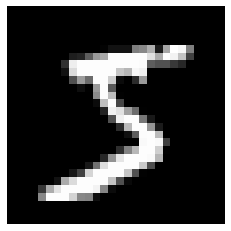

In [80]:
# Visualizing data for better understanding

plt.imshow(X_train[0], cmap = 'gray')
plt.axis('off')
plt.show()

In [81]:
y_train[0]

5

In [82]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [83]:
# Normalizing our data in range [0, 1] 

X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [84]:
# Defining our Sequential model

model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28, 28)),    # Flatten layer
                          keras.layers.Dense(300, activation = 'relu'),    # Hidden layer 1
                          keras.layers.Dense(100, activation = 'relu'),    # Hidden layer 2
                          keras.layers.Dense(10, activation = 'sigmoid')   # Output layer
])

In [85]:
# Compiling our model

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [86]:
# Training our Model

model.fit(X_train_scaled, y_train,
          epochs = 10,
          batch_size = 14)

Epoch 1/10
4286/4286 [==============================] - 8s 2ms/step - loss: 0.3276 - accuracy: 0.9011
Epoch 2/10
4286/4286 [==============================] - 8s 2ms/step - loss: 0.0862 - accuracy: 0.9729
Epoch 3/10
4286/4286 [==============================] - 8s 2ms/step - loss: 0.0578 - accuracy: 0.9822
Epoch 4/10
4286/4286 [==============================] - 8s 2ms/step - loss: 0.0440 - accuracy: 0.9864
Epoch 5/10
4286/4286 [==============================] - 9s 2ms/step - loss: 0.0349 - accuracy: 0.9891
Epoch 6/10
4286/4286 [==============================] - 8s 2ms/step - loss: 0.0284 - accuracy: 0.9902
Epoch 7/10
4286/4286 [==============================] - 8s 2ms/step - loss: 0.0240 - accuracy: 0.9926
Epoch 8/10
4286/4286 [==============================] - 8s 2ms/step - loss: 0.0187 - accuracy: 0.9942
Epoch 9/10
4286/4286 [==============================] - 8s 2ms/step - loss: 0.0181 - accuracy: 0.9943
Epoch 10/10
4286/4286 [==============================] - 8s 2ms/step - loss: 0.016

In [87]:
# Calculating loss and accuracy on our test data

loss, accuracy = model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1080 - accuracy: 0.9790


In [88]:
print("Accuracy: ",accuracy)

Accuracy:  0.9789999723434448


In [89]:
print("Loss: ",loss)

Loss:  0.10797300934791565


In [90]:
# Making Prediction on test data

y_pred = model.predict(X_test)
y_pred[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Our y_pred is in categorical format, so we changed it

In [91]:
pred_labels = [np.argmax(i) for i in y_pred]

In [92]:
pred_labels[: 10]

[7, 1, 1, 0, 4, 1, 4, 4, 5, 9]

In [93]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [94]:
# Calculating Confusion Matrix

cm = tf.math.confusion_matrix(y_test, pred_labels)

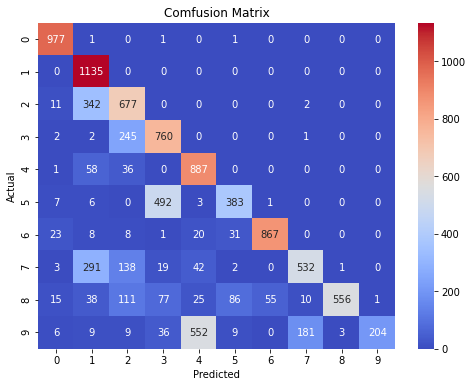

In [95]:
# Visualizing Confusion Matrix

plt.figure(figsize = (8, 6))
sns.heatmap(cm, cmap = 'coolwarm', annot = True, fmt = 'd')
plt.title("Comfusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [96]:
import cv2

In [97]:
img = cv2.imread('img.png')

In [98]:
from keras.preprocessing import image

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


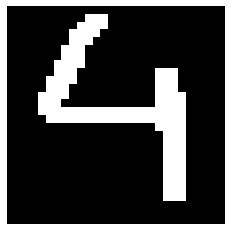

In [99]:
from keras.preprocessing import image
img = image.load_img('img04.png', grayscale = True, target_size = (28, 28,1))
plt.imshow(img, cmap = 'gray')
plt.axis('off')
img = image.img_to_array(img)
img = img / 255.0
img = img.reshape((1, 28, 28, 1))
img_class = model.predict(img)
img_class = np.argmax(img_class)
prediction = img_class

In [100]:
prediction

4

## Thank You!